<a href="https://colab.research.google.com/github/srgmnagar/synapse_tasks/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'ge-2-24-results-csv:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5517812%2F9136911%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240809%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240809T032702Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D261e398be25389a62d490fe41975e47ddc3f3e4d8055739a727684c93ad13064d2a26ce6c9179fc51aa30de6e455fdd6cadcf825837fd2945c74113ebfeab570b74729d16598bc0a998f2465d926d17031a94ff75067a81a18348392658b37c7427ed401996b02d01c4209898088f902be10b3149f111b79e4e86db9c3c174aae05f7a3558bf405664a60402469a3aa5b51c5e1685b70e5be1968d90225df4c6b9d104b1ae03c343b3c3593a6acb44de8321555365152982fa45f93d09967c70fb65f232eaaf756aa718f5a064af961488b7d1d13d23c72a2278ed1a62d9da17051c3acd678928fb3f98cd5c611859b0bf3cf9dc91e4a6a7d13810c8ba4196d8'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


# Synapse Task 2

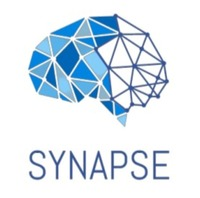

### Run the following cell to import the required libraries.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Welcome to the second task on your road to being a part of the Synapse fam. This task will be focusing on the first step of beginning any ML or Data Science project which Data Preprocessing. One may ask why do we need to clean data? Imagine you are trying to make some food,you need to clean the vegetables, cut them, dice them, season them right? Any end product needs preprocessing and that is what we will be exploring in this task.

Now, use this link to download the dataset and upload it to your kaggle notebook on the input window on the right side.
https://drive.google.com/file/d/1d4Yq5AlqFkkNAsOeI2HO9jQ41EOp4qmJ/view?usp=sharing

Save it under the same name as the file name if the name doesn't match one in the code given below, change the path as '/kaggle/input/folder_name/file_name.csv'

We will be using this dataset to carry out basic pandas and matplotlib commands.


use this image as reference

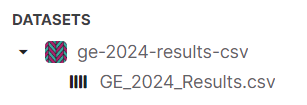

### To make your dataframe run this cell

In [ ]:
df = pd.read_csv('/kaggle/input/ge-2-24-results-csv/GE_2024_Results .csv')
df

This is a tabular dataset consisting of the results of Indian General Elections 2024. As you can see when you print the dataframe you can see its size at the bottom.

There is another way to find out the dimensions of a dataframe. Enter the code to find that out in the following cell.

In [ ]:
df.shape

Write the code to display the first 20 rows of the dataframe.

In [ ]:
df.iloc[1:21]

You can see that we already have one column for indices and we dont need an extra to create consfusion. Write a code to remove the ID column.

In [ ]:
df=df.drop("ID",axis=1)

You can see some NaN values in the dataframe, these are something that will cause errors later and we don't want that. Write a code to remove these values from our dataframe. Additionally you'll see that the index values are not in order. Take care of that as well :)

In [ ]:
df.dropna(inplace=True)
df
df.shape

If all is correct your dataframe should have 8902 rows and 9 columns.

### The previous commands were just to make sure we have a workable dataframe now, we'll do some manipulations on the data.

Find out the top 5 most voted candidates in Telangana

df[""]

In [ ]:
df[df['State'] == 'Telangana'].sort_values(by='Total Votes', ascending=False).head(5)[['Candidate', 'Total Votes']]

Find out the total number of votes received by each state

In [ ]:
df.groupby('State')['Total Votes'].sum().sort_values(ascending=False)

Show these values as a percentage of the total number of votes received in the election.

In [ ]:
((df.groupby('State')['Total Votes'].sum()/df['Total Votes'].sum())*100).sort_values(ascending=False)

Now, display the top 5 parties and find out the number of votes received by them

In [ ]:
df.groupby('Party')['Total Votes'].sum().sort_values(ascending=False).head(5)

In [ ]:
df

From the candidates who lost, list 10 candidates who got the highest percent votes.

In [ ]:
df[df['Result'] == 'Lost'].sort_values(by=['% of Votes'],ascending=False).head(10)

### These techniques help to understand the data that we have but we like something a bit more visual right? That's where matplotlib comes to our aid.

Make a piechart to show the votes recieved by the top 5 candidates in the elections.

In [ ]:

plt.figure(figsize = (5,5))
df.groupby('Candidate')['Total Votes'].sum().sort_values(ascending=False).head(5).plot(kind = 'pie',color='red')
plt.title("votes recieved by the top 5 candidates ")
plt.show()

Make a bar graph to see the postal votes received by the parties in Karnataka

In [ ]:
#plt.figure(figsize = (5,5))
#df.loc[df["State" == "Karnataka"].groupby("Party")["Postal Votes"].sum().sort_values(ascending = False).plot(kind = 'bar')
#plt.title("the postal votes received by the parties in Karnataka ")
#plt.show()

### Congratulations on making it to the end. EDA is a very vital toolkit to tackle Machine Learning problems. Hopefully this task helped you understand concepts of data analysis and visualisation. See you at the interviews :)

For any doubts contact:

Taran Shah: +91 9619223242

Divyam Jain: +91 96193 77044